In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from IPython.display import HTML

from os import listdir
print(listdir("input"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Any results you write to the current directory are saved as output.



/home/jcsc/miniconda3/envs/kgl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jcsc/miniconda3/envs/kgl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jcsc/miniconda3/envs/kgl/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


['train.csv.zip', 'train.csv', 'test.zip', 'test']


In [2]:
train = pd.read_csv("input/train.csv", nrows=10000000)
train.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [3]:
train.rename({"acoustic_data": "signal", "time_to_failure": "quaketime"}, axis="columns", inplace=True)
train.head(5)

,signal,quaketime
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [4]:


for n in range(5):
    print(train.quaketime.values[n])



1.4690999832
1.4690999821000001
1.4690999809999998
1.4690999799000002
1.4690999787999999


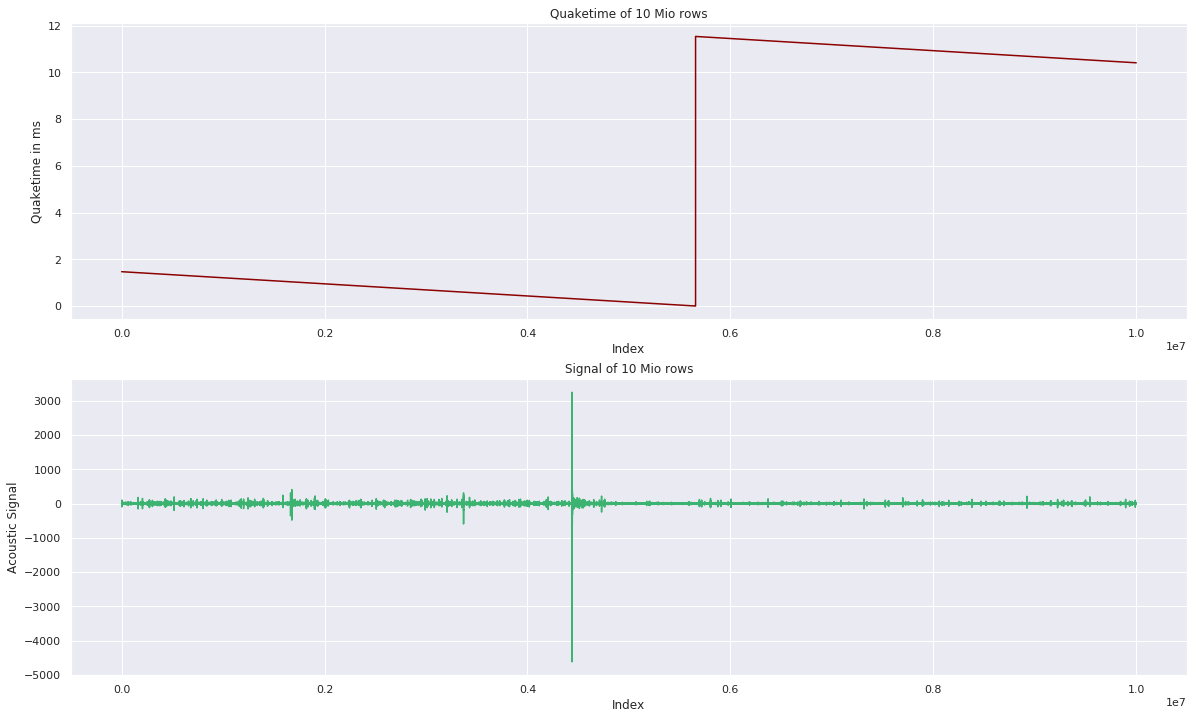

In [5]:


fig, ax = plt.subplots(2,1, figsize=(20,12))
ax[0].plot(train.index.values, train.quaketime.values, c="darkred")
ax[0].set_title("Quaketime of 10 Mio rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Quaketime in ms");
ax[1].plot(train.index.values, train.signal.values, c="mediumseagreen")
ax[1].set_title("Signal of 10 Mio rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Acoustic Signal");



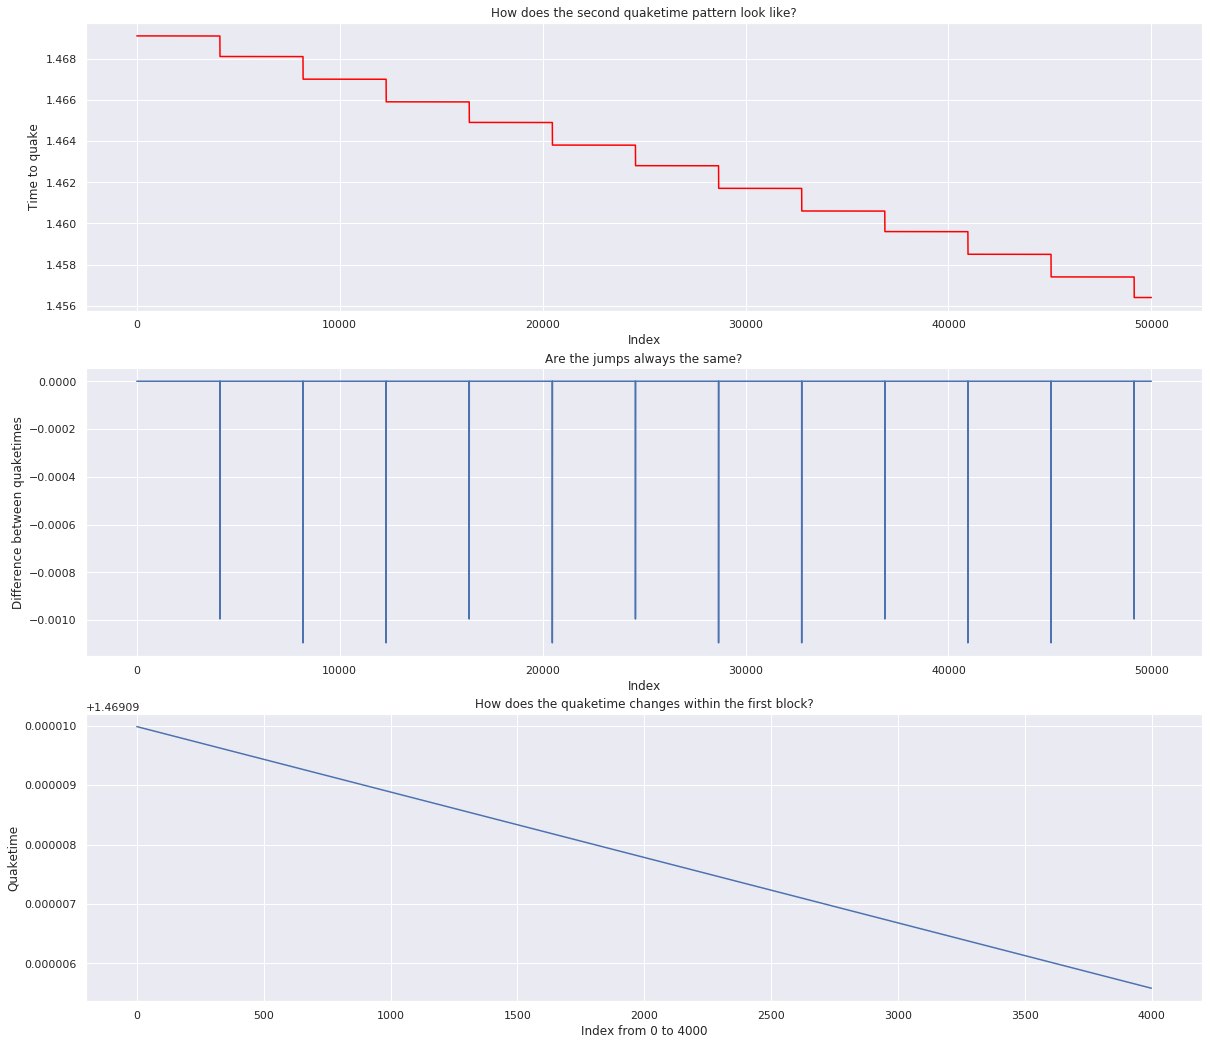

In [6]:
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(train.index.values[0:50000], train.quaketime.values[0:50000], c="Red")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to quake")
ax[0].set_title("How does the second quaketime pattern look like?")
ax[1].plot(train.index.values[0:49999], np.diff(train.quaketime.values[0:50000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Difference between quaketimes")
ax[1].set_title("Are the jumps always the same?")
ax[2].plot(train.index.values[0:4000], train.quaketime.values[0:4000])
ax[2].set_xlabel("Index from 0 to 4000")
ax[2].set_ylabel("Quaketime")
ax[2].set_title("How does the quaketime changes within the first block?");

In [7]:
test_path = "input/test/"


In [8]:
test_files = listdir("input/test")
print(test_files[0:5])

['seg_aa98cc.csv', 'seg_8dcf3c.csv', 'seg_93211c.csv', 'seg_a49ccc.csv', 'seg_bc437b.csv']


In [9]:
len(test_files)

2624

In [10]:


sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head(2)



,seg_id,time_to_failure
0,seg_00030f,0
1,seg_0012b5,0


In [11]:


len(sample_submission.seg_id.values)



2624

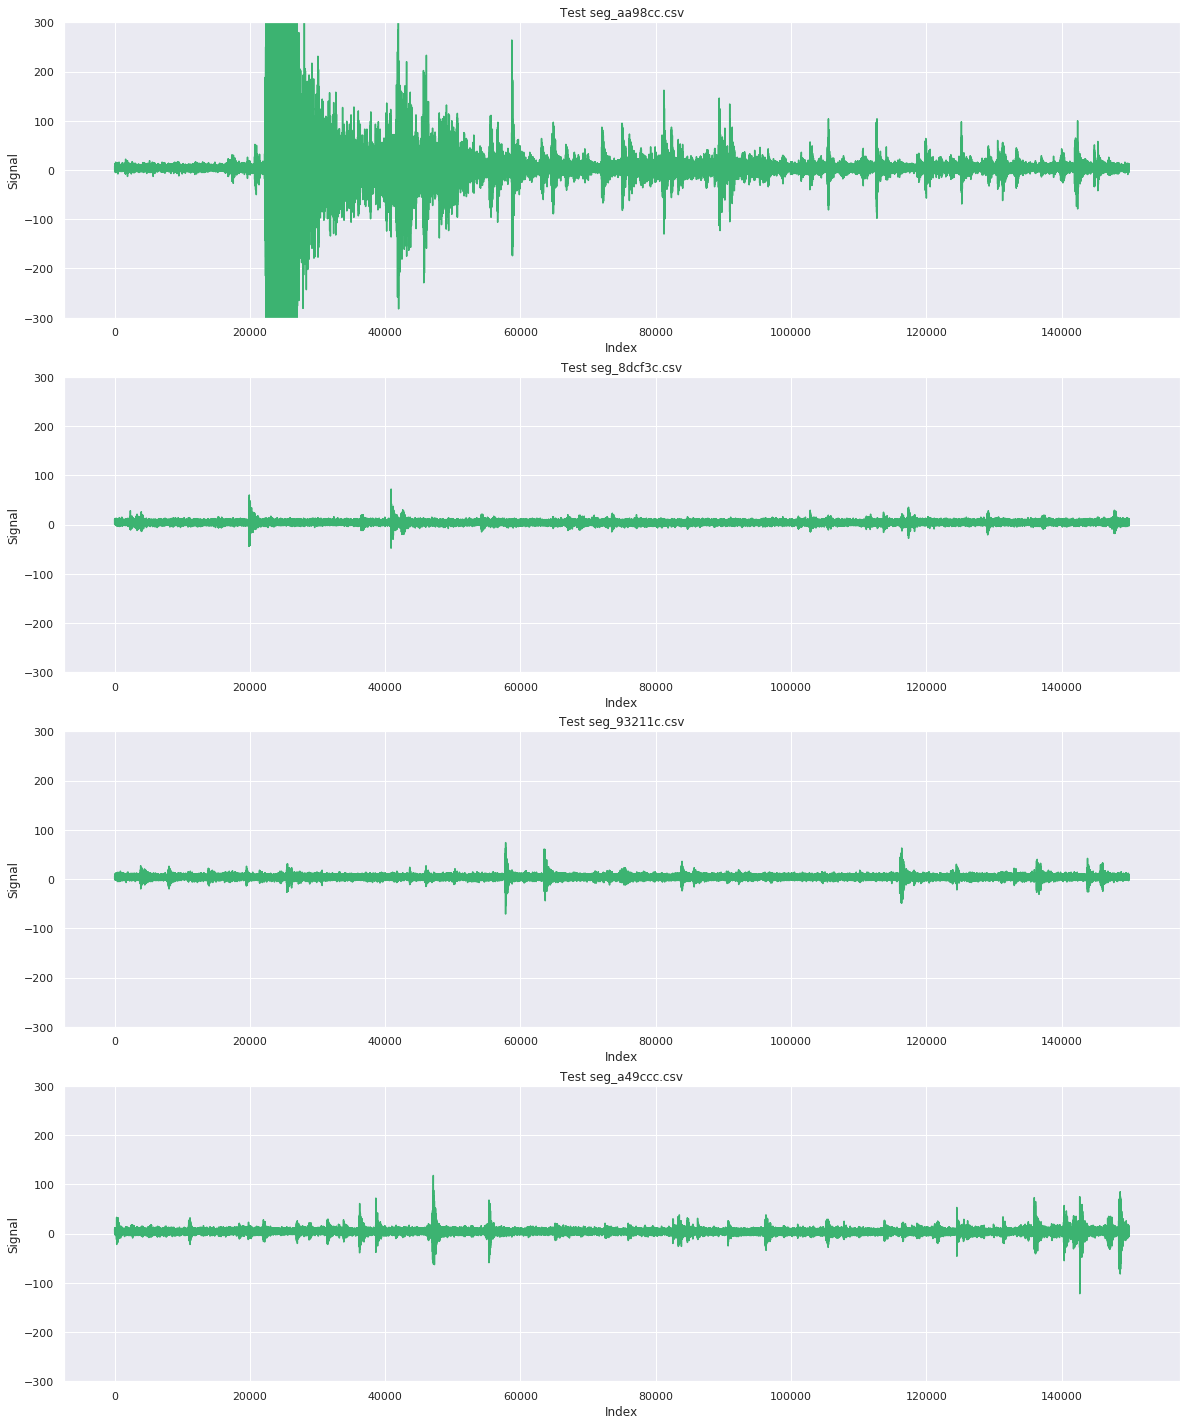

In [12]:
fig, ax = plt.subplots(4,1, figsize=(20,25))

for n in range(4):
    seg = pd.read_csv(test_path  + test_files[n])
    ax[n].plot(seg.acoustic_data.values, c="mediumseagreen")
    ax[n].set_xlabel("Index")
    ax[n].set_ylabel("Signal")
    ax[n].set_ylim([-300, 300])
    ax[n].set_title("Test {}".format(test_files[n]));

In [13]:


train.describe()



,signal,quaketime
count,1.000000e+07,1.000000e+07
mean,4.502072e+00,5.183598e+00
std,1.780707e+01,5.091286e+00
min,-4.621000e+03,7.954798e-04
25%,2.000000e+00,6.498971e-01
50%,4.000000e+00,1.298899e+00
75%,7.000000e+00,1.089170e+01
max,3.252000e+03,1.154080e+01


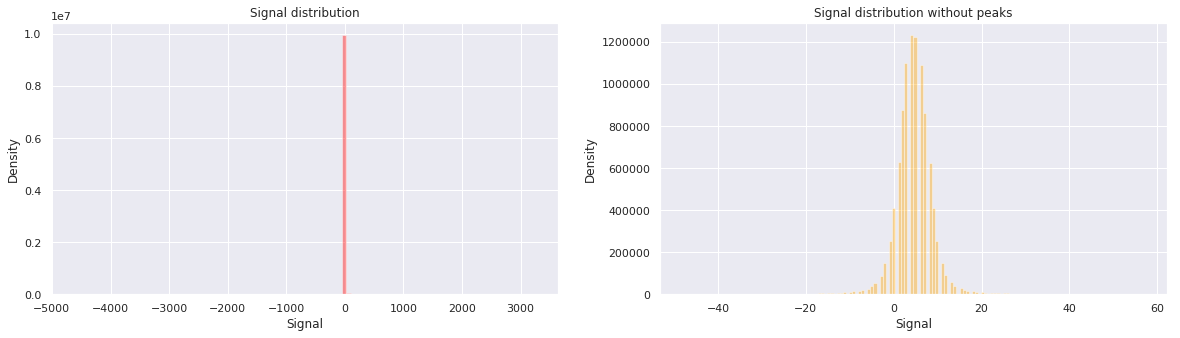

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(train.signal.values, ax=ax[0], color="Red", bins=100, kde=False)
ax[0].set_xlabel("Signal")
ax[0].set_ylabel("Density")
ax[0].set_title("Signal distribution")

low = train.signal.mean() - 3 * train.signal.std()
high = train.signal.mean() + 3 * train.signal.std() 
sns.distplot(train.loc[(train.signal >= low) & (train.signal <= high), "signal"].values,
             ax=ax[1],
             color="Orange",
             bins=150, kde=False)
ax[1].set_xlabel("Signal")
ax[1].set_ylabel("Density")
ax[1].set_title("Signal distribution without peaks");

In [15]:


stepsize = np.diff(train.quaketime)
train = train.drop(train.index[len(train)-1])
train["stepsize"] = stepsize
train.head(5)



,signal,quaketime,stepsize
0,12,1.4691,-1.100000e-09
1,6,1.4691,-1.100000e-09
2,8,1.4691,-1.100000e-09
3,5,1.4691,-1.100000e-09
4,8,1.4691,-1.100000e-09


In [16]:


train.stepsize = train.stepsize.apply(lambda l: np.round(l, 10))



In [17]:


stepsize_counts = train.stepsize.value_counts()
stepsize_counts



-1.100000e-09    5655193
-1.000000e-09    3907598
-2.000000e-09     434767
-1.095496e-03        882
-1.095495e-03        679
-9.954955e-04        497
-9.954950e-04        381
-1.095497e-03          1
 1.154000e+01          1
Name: stepsize, dtype: int64

In [18]:
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(n_splits=5)

In [19]:


window_sizes = [10, 50, 100, 1000]
for window in window_sizes:
    train["rolling_mean_" + str(window)] = train.signal.rolling(window=window).mean()
    train["rolling_std_" + str(window)] = train.signal.rolling(window=window).std()



In [20]:


train["rolling_q25"] = train.signal.rolling(window=50).quantile(0.25)
train["rolling_q75"] = train.signal.rolling(window=50).quantile(0.75)
train["rolling_q50"] = train.signal.rolling(window=50).quantile(0.5)
train["rolling_iqr"] = train.rolling_q75 - train.rolling_q25
train["rolling_min"] = train.signal.rolling(window=50).min()
train["rolling_max"] = train.signal.rolling(window=50).max()
train["rolling_skew"] = train.signal.rolling(window=50).skew()
train["rolling_kurt"] = train.signal.rolling(window=50).kurt()



In [21]:
train["rolling_q25"]

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14          NaN
15          NaN
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
24          NaN
25          NaN
26          NaN
27          NaN
28          NaN
29          NaN
           ... 
9999969    3.00
9999970    3.00
9999971    3.00
9999972    3.00
9999973    3.00
9999974    3.00
9999975    3.00
9999976    3.25
9999977    3.25
9999978    4.00
9999979    3.25
9999980    3.25
9999981    3.25
9999982    4.00
9999983    4.00
9999984    4.00
9999985    4.00
9999986    4.00
9999987    4.00
9999988    4.00
9999989    4.00
9999990    4.00
9999991    4.00
9999992    4.00
9999993    4.00
9999994    4.00
9999995    4.00
9999996    4.00
9999997    4.00
9999998    4.00
Name: rolling_q25, Lengt